# 특성 공학과 규제
- 이전 선형 회귀 모델 훈련에서 1개의 파라미터보다는 2개이상의 파라미터가 더 높은 성능을 낸다는것을 알아냈다. (특성이 많을 수록 즉, 다항이 될수록 성능이 좋아짐) 
- 사이킨 런에서는 PolynomialFeatures 클래스를 사용하여 다항 회귀를 쉽게 적용할 수 있다.
- 농어의 무게를 예측하기 위해서 [길이, 높이] 데이터가 주어졌을 때, 다항을 만들기위해서 [길이*높이]같은 새로운 특성을 만들어내는 작업을 **특성공학** 이라고한다.

## 다중 회귀 (multiple regression)
- 여러 개의 특성을 사용한 회귀를 다중회귀라고 부른다.

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(perch_full, perch_weight, random_state=42) 

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [7]:
from sklearn.preprocessing import PolynomialFeatures 
# 사이킷런이 제공하느 변환기(transfomer)
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

# Y = a*X + b  에서  b를 뺀다. -> 절편을 위한 항이 제거됨.  특성의 제곱과 서로 곱한 항만 추가
poly = PolynomialFeatures(include_bias=False) 
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# 무게 = a * 길이 + b*높이 + c*두꼐 + d*1

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


In [17]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_X)
train_poly = poly.transform(train_X)
test_poly = poly.transform(test_X)
print(f'{train_poly.shape} perch_full은 3개의 특성만 가지고 있지만 poly.transform으로  6개의 특성들을 추가로 만들어냈다.')
print(f'특성들은 다음과 같다. {poly.get_feature_names()}')


(42, 9) perch_full은 3개의 특성만 가지고 있지만 poly.transform으로  6개의 특성들을 추가로 만들어냈다.
특성들은 다음과 같다. ['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_poly, train_Y)
print(lr.score(train_poly, train_Y))
print(lr.score(test_poly, test_Y))

0.9903183436982124
0.9714559911594132


In [21]:
# 고차항 옵션값을 5로주어 5제곱까지 특성을 만들어보자
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_X)
train_poly = poly.transform(train_X)
test_poly = poly.transform(test_X)
print(f'{train_poly.shape} perch_full은 3개의 특성만 가지고 있지만 poly.transform으로  52개의 특성들을 추가로 만들어냈다.')
print(f'특성들은 다음과 같다. {poly.get_feature_names()}')


(42, 55) perch_full은 3개의 특성만 가지고 있지만 poly.transform으로  52개의 특성들을 추가로 만들어냈다.
특성들은 다음과 같다. ['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3', 'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2', 'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2', 'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3', 'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4', 'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5', 'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5']


In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_poly, train_Y)
print(lr.score(train_poly, train_Y))
print(lr.score(test_poly, test_Y))
# test set의 길이보다 더 긴 복잡한 특성들을 가지고 있어 overfitting 발생 
# 규제(regularzation)가 필요하다.

0.9999999999991096
-144.40579242335605


## 규제 (regularzation)
- overfitting된 모델은 적절한 규제가 필요하다.
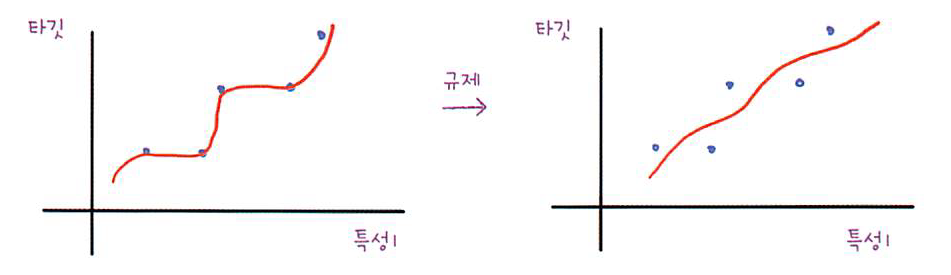

- 사이킷런에서는 이를 위해 릿지모델과 라쏘 모델을 제공한다.
   - 릿지 (일반적으로 더 많이 쓰임)
    - 계수를 제곱한 값을 기준으로 규제적용
  - 라쏘
    - 계수의 절댓값 기준으로 규제를 적용

In [41]:
# 2장에서 했던 정규화를 진행한다. (데이터간의 스케일 차이가 심해서 곱해지는 계수값도 많이 차이나기 떄문에 진행해야함)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # 해당 모델로 표준점수로 바꾼다
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_Y)
print(ridge.score(train_scaled, train_Y))
print(ridge.score(test_scaled, test_Y))

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_Y)
print(lasso.score(train_scaled, train_Y))
print(lasso.score(test_scaled, test_Y))

0.9896101671037343
0.9790693977615398
0.9897898972080961
0.9800593698421883


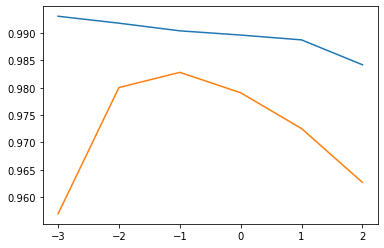

테스트 세트에는 오버피팅의 모습을 보임. 우측으로 갈수록 둘다 언더피팅의 모습
위에서 가장 두 차트가 가까웠던 -1을  alpha값으로 전달 10^-1 = 0.1 후 훈련
0.9903815817570366
0.9827976465386927


In [43]:
import matplotlib.pyplot as plt

# 두 모델의 성능 확인

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(train_scaled,  train_Y)
    train_score.append(ridge.score(train_scaled, train_Y))
    test_score.append(ridge.score(test_scaled, test_Y))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()
print('테스트 세트에는 오버피팅의 모습을 보임. 우측으로 갈수록 둘다 언더피팅의 모습')


import matplotlib.pyplot as plt

# 두 모델의 성능 확인
print('위에서 가장 두 차트가 가까웠던 -1을  alpha값으로 전달 10^-1 = 0.1 후 훈련')
ridge = Ridge(alpha=0.1,)
ridge.fit(train_scaled,  train_Y)

print(ridge.score(train_scaled, train_Y))
print(ridge.score(test_scaled, test_Y))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


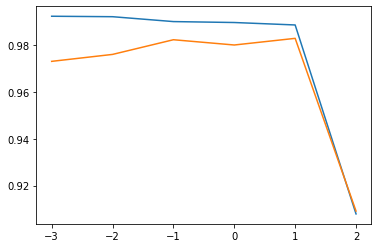

위에서 가장 두 차트가 가까웠던 1을  alpha값으로 전달 10^1 = 10 후 훈련
0.9888067471131867
0.9824470598706695
40


In [47]:

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled,  train_Y)
    train_score.append(lasso.score(train_scaled, train_Y))
    test_score.append(lasso.score(test_scaled, test_Y))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

print('위에서 가장 두 차트가 가까웠던 1을  alpha값으로 전달 10^1 = 10 후 훈련')
lasso = Lasso(alpha=10,)
lasso.fit(train_scaled,  train_Y)
print(lasso.score(train_scaled, train_Y))
print(lasso.score(test_scaled, test_Y))

print(np.sum(lasso.coef_ == 0)) # PolynomialFeatures로 만들었던 55개의 파라미터중 40개만 쓰였다. 15는 0으로 수렴함

1. 모델을 다항식, 고차항식으로 만들면 성능이 좋아진다. 하지만 이에 따른 사이드이펙트로 오버피팅, 언더피팅이 발생한다.
2. 릿지와 라쏘는 이 부분을 완화시켜 준다.
  - 릿지는 계수를 작게만든다.
  - 라소는 쓸모없는 계수값을 아예 0으로 만들 수도 있다
3. 사람이 주입하는 하이퍼 파라미터는 데이터를 시각화하여 찾아냈다. 여기서는 alpha값이 그 예이다. fkdslkf;;sldfk;sfldsfkldld